# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

df = pd.read_csv("data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [121]:
#Distribution of LoanStatus segregate by Education - count()
education_loan = df.groupby('Education', as_index=False)['Loan_Status'].count()
print(education_loan)

      Education  Loan_Status
0      Graduate          480
1  Not Graduate          134


<AxesSubplot:xlabel='Education', ylabel='Loan_Status'>

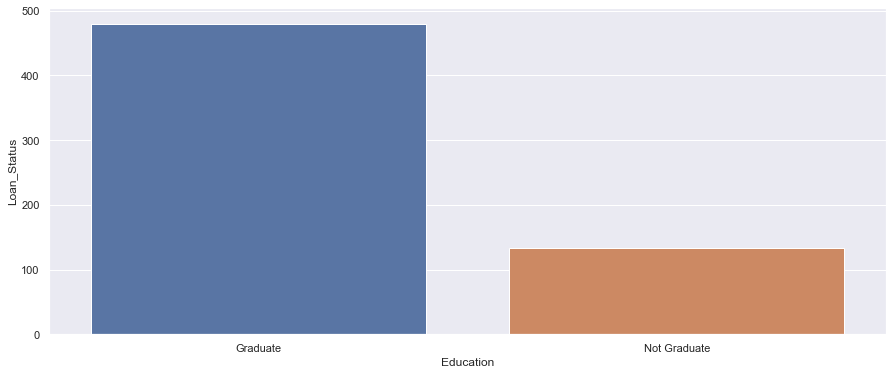

In [122]:
sns.barplot(x='Education',y='Loan_Status',data=education_loan)

In [123]:
#Distribution of LoanStatus segregate by Martial Status - count()
married_loan = df.groupby('Married', as_index=False)['Loan_Status'].count()
print(married_loan)

  Married  Loan_Status
0      No          213
1     Yes          398


<AxesSubplot:xlabel='Married', ylabel='Loan_Status'>

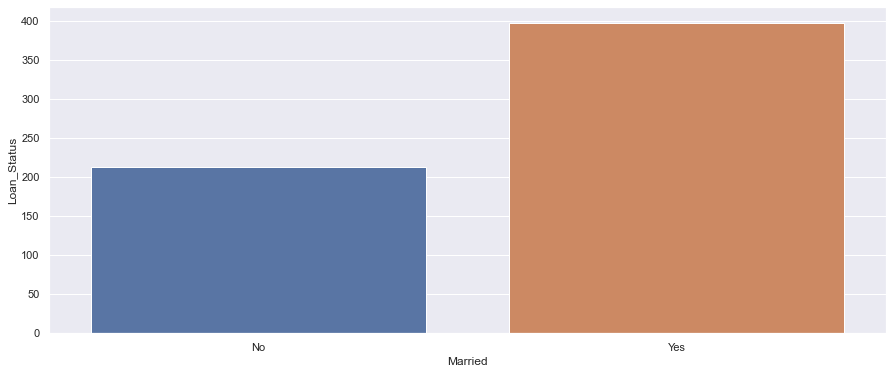

In [124]:
sns.barplot(x='Married',y='Loan_Status',data=married_loan)

1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [5]:
# 1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:>

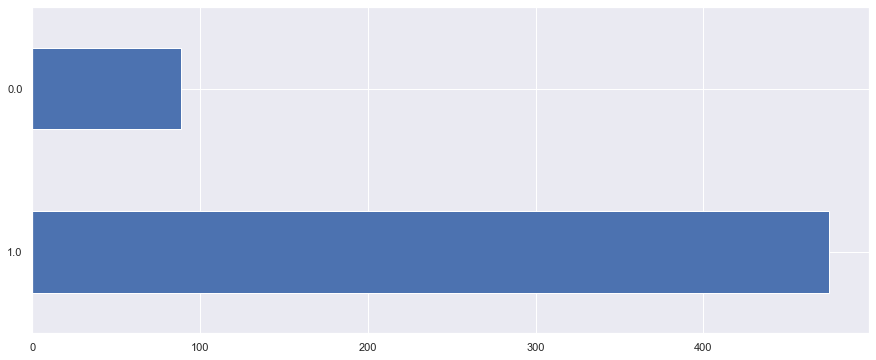

In [8]:
df['Credit_History'].value_counts().plot.barh()

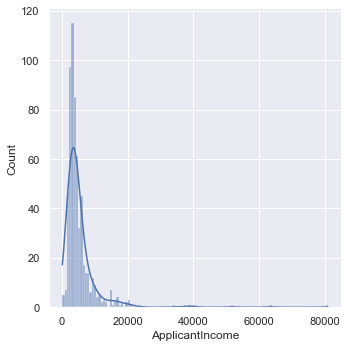

In [9]:
# 2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
sns.set(rc={'figure.figsize':(15,6)})
sns.displot(data=df['ApplicantIncome'], kde=True)
plt.show()

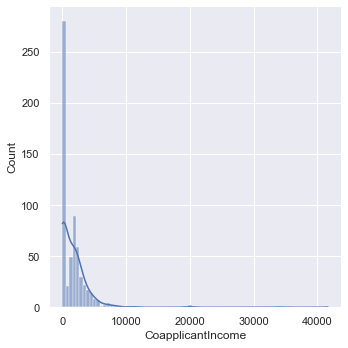

In [10]:
sns.set(rc={'figure.figsize':(15,6)})
sns.displot(data=df['CoapplicantIncome'], kde=True)

In [11]:
print("Credit History Mean:", df['Credit_History'].mean())
print("Credit History Median:", df['Credit_History'].median())
print()
print("ApplicantIncome Mean:", df['ApplicantIncome'].mean())
print("ApplicantIncome Median:", df['ApplicantIncome'].median())
print()
print("CoapplicantIncome Mean:", df['CoapplicantIncome'].mean())
print("CoapplicantIncome Median:", df['CoapplicantIncome'].median())

Credit History Mean: 0.8421985815602837
Credit History Median: 1.0

ApplicantIncome Mean: 5403.459283387622
ApplicantIncome Median: 3812.5

CoapplicantIncome Mean: 1621.2457980271008
CoapplicantIncome Median: 1188.5


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [12]:
#Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:>

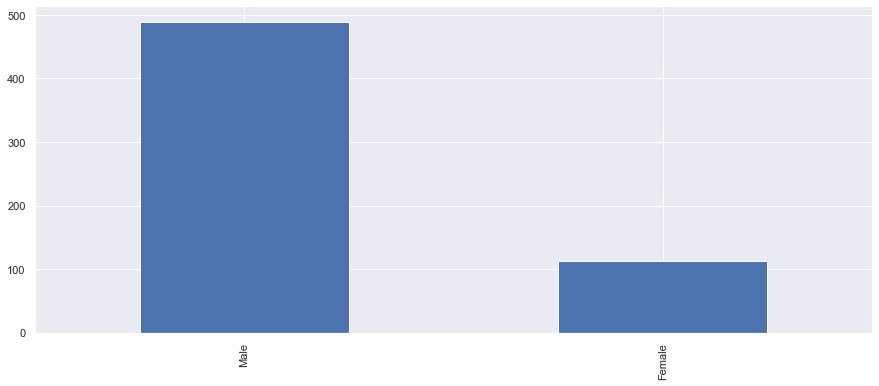

In [13]:
df['Gender'].value_counts().plot.bar()

In [14]:
#Martial Status
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:>

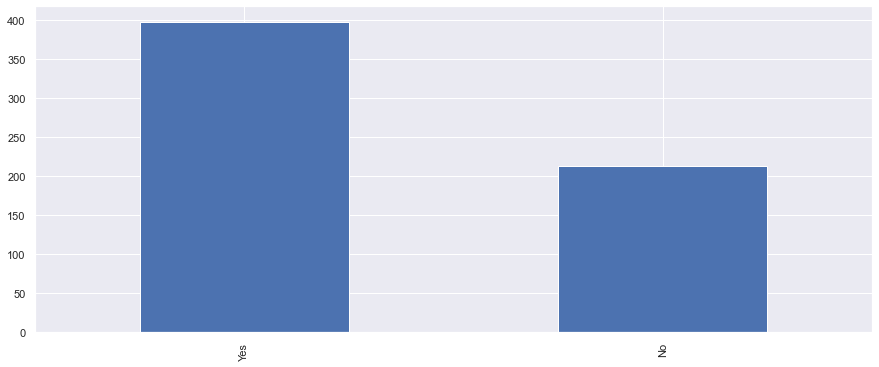

In [15]:
df['Married'].value_counts().plot.bar()

In [16]:
#Self-Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:>

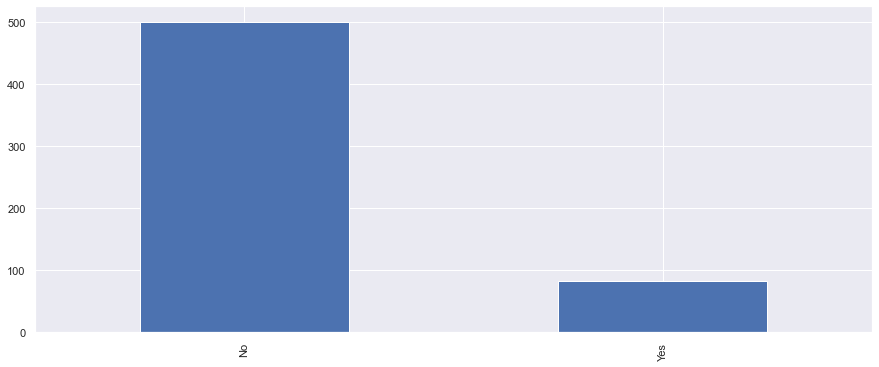

In [17]:
df['Self_Employed'].value_counts().plot.bar()

In [18]:
#Education
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:>

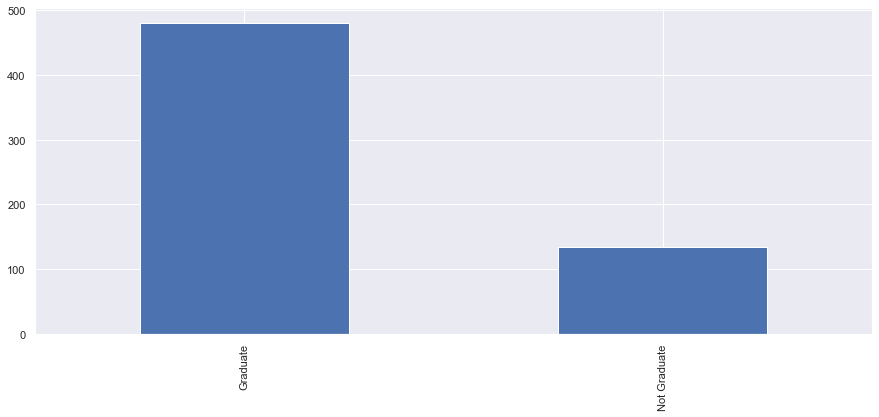

In [19]:
df['Education'].value_counts().plot.bar()

In [20]:
#Property Area
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:>

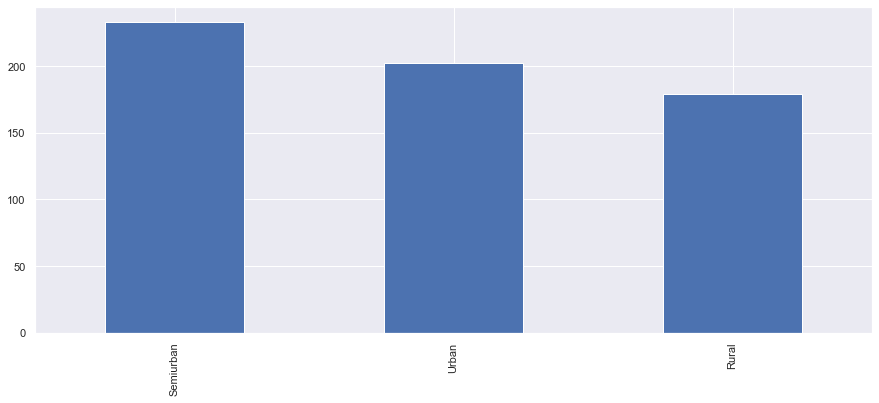

In [21]:
df['Property_Area'].value_counts().plot.bar()

In [22]:
#Number of Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:>

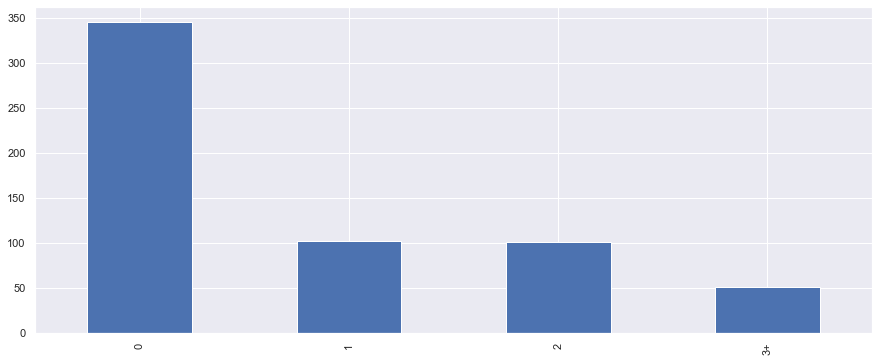

In [23]:
df['Dependents'].value_counts().plot.bar()

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

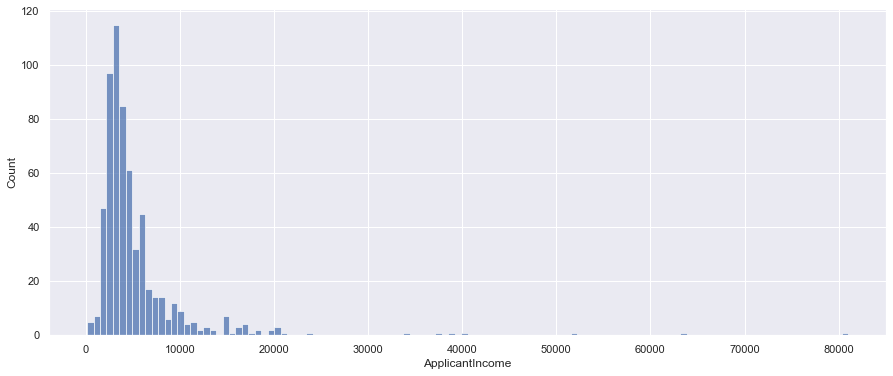

In [24]:
#Applicant Income Histogram
sns.histplot(data=df, x="ApplicantIncome")

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

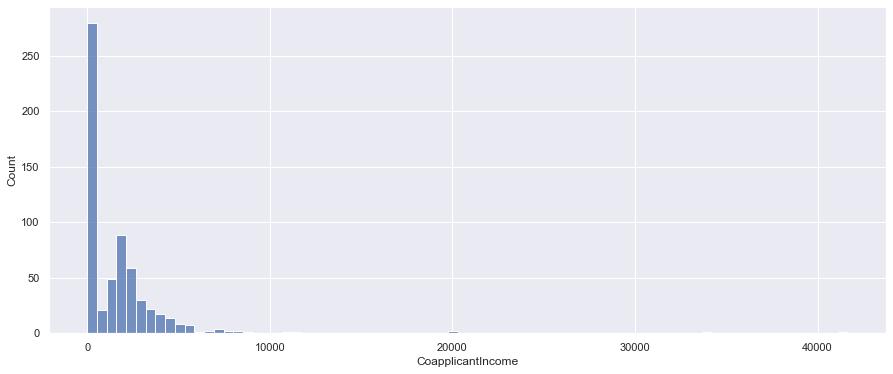

In [25]:
#Coapplicant Income Histogram
sns.histplot(data=df, x="CoapplicantIncome")


Look at box plots to understand the distributions. 

<AxesSubplot:xlabel='ApplicantIncome'>

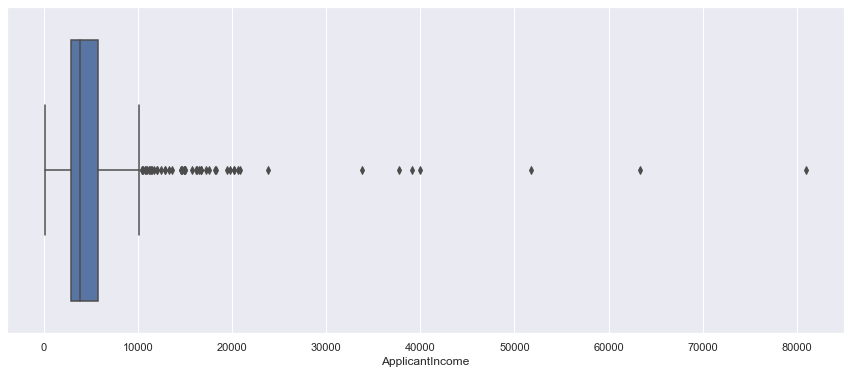

In [26]:
#To Visualize Outliers, outliers are between the 2 short lines.
#This also helps understand distributions - ApplicantIncome
warnings.filterwarnings('ignore')

sns.boxplot(df.ApplicantIncome)

<AxesSubplot:xlabel='CoapplicantIncome'>

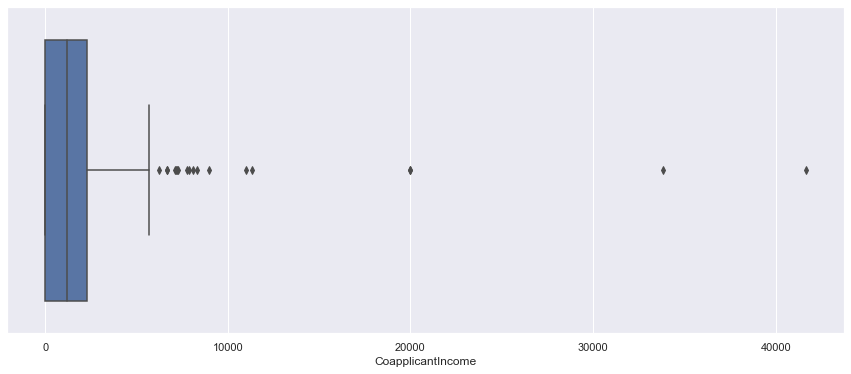

In [27]:
#CoapplicantIncome
warnings.filterwarnings('ignore')

sns.boxplot(df.CoapplicantIncome)

Look at the distribution of income segregated  by `Education`

In [28]:
#Distribution of ApplicantIncome segregate by Education - sum()
education_group = df.groupby('Education', as_index=False)['ApplicantIncome'].sum()
print(education_group)

      Education  ApplicantIncome
0      Graduate          2811568
1  Not Graduate           506156


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

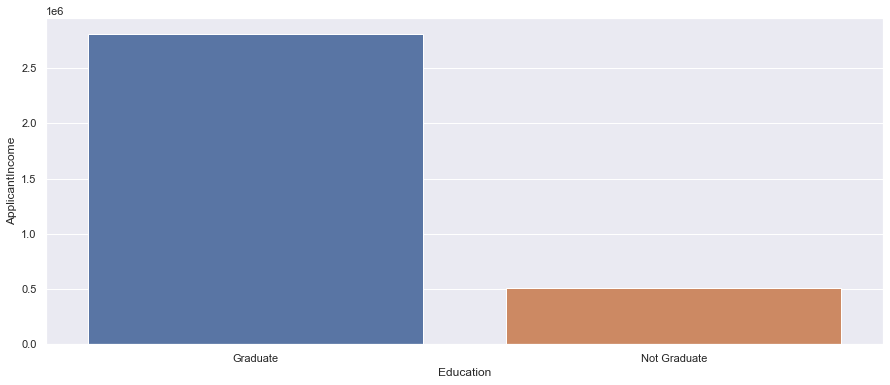

In [29]:
sns.barplot(x='Education',y='ApplicantIncome',data=education_group)

In [30]:
#Distribution of ApplicantIncome segregate by Education - mean()
education_group_mean = df.groupby('Education', as_index=False)['ApplicantIncome'].mean()
print(education_group_mean)

      Education  ApplicantIncome
0      Graduate      5857.433333
1  Not Graduate      3777.283582


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

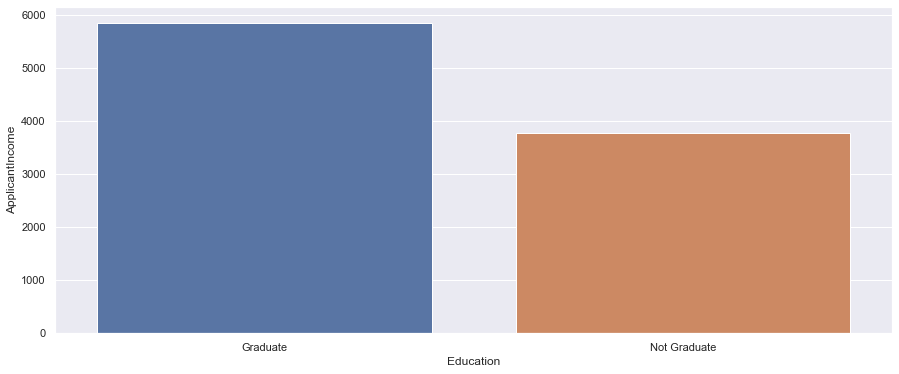

In [31]:
sns.barplot(x='Education',y='ApplicantIncome',data=education_group_mean)

In [32]:
#Distribution of CoapplicantIncome segregate by Education - sum()
education_group_c = df.groupby('Education', as_index=False)['CoapplicantIncome'].sum()
print(education_group_c)

      Education  CoapplicantIncome
0      Graduate      824387.919989
1  Not Graduate      171057.000000


<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

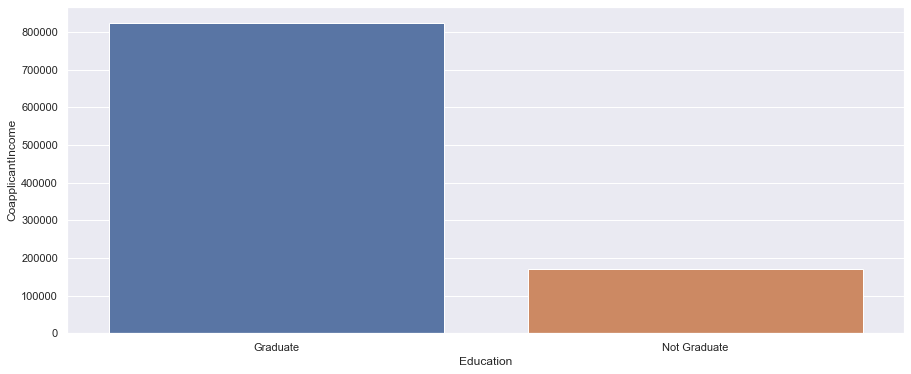

In [33]:
sns.barplot(x='Education',y='CoapplicantIncome',data=education_group_c)

In [34]:
#Distribution of CoapplicantIncome segregate by Education - mean()
education_group_c_mean = df.groupby('Education', as_index=False)['CoapplicantIncome'].mean()
print(education_group_c_mean)

      Education  CoapplicantIncome
0      Graduate        1717.474833
1  Not Graduate        1276.544776


<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

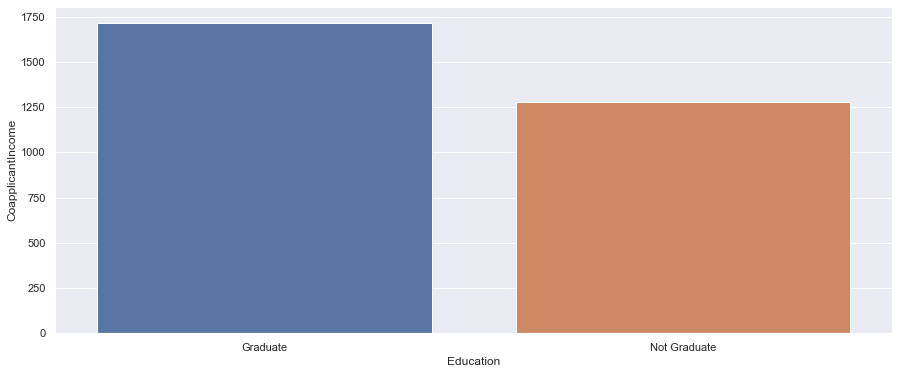

In [35]:
sns.barplot(x='Education',y='CoapplicantIncome',data=education_group_c_mean)

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

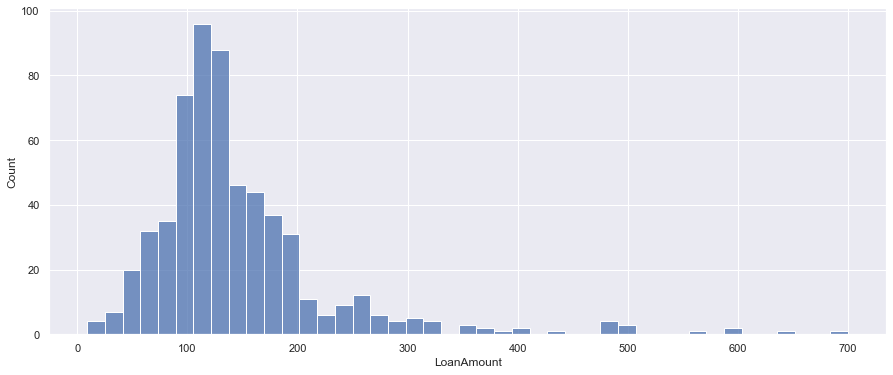

In [36]:
#Loan Amount Histogram in the thousands
sns.histplot(data=df, x="LoanAmount")

<AxesSubplot:xlabel='LoanAmount'>

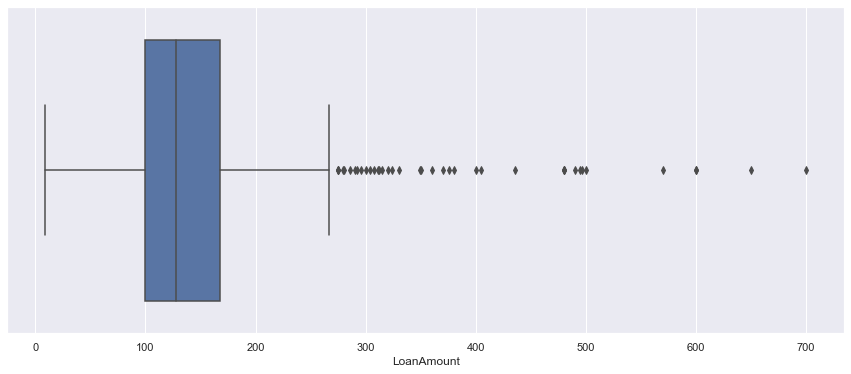

In [37]:
#LoanAmount
warnings.filterwarnings('ignore')

sns.boxplot(df.LoanAmount)

In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [39]:
#Mean
table = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Gender', 'Education'],
                    aggfunc={'ApplicantIncome': np.mean,
                             'LoanAmount': np.mean})

In [40]:
table

ApplicantIncome  LoanAmount
Gender Education                                
Female Graduate          4646.467391  129.855556
       Not Graduate      4629.700000  111.736842
Male   Graduate          5992.345745  157.994490
       Not Graduate      3630.061947  119.654206

<AxesSubplot:xlabel='Gender,Education'>

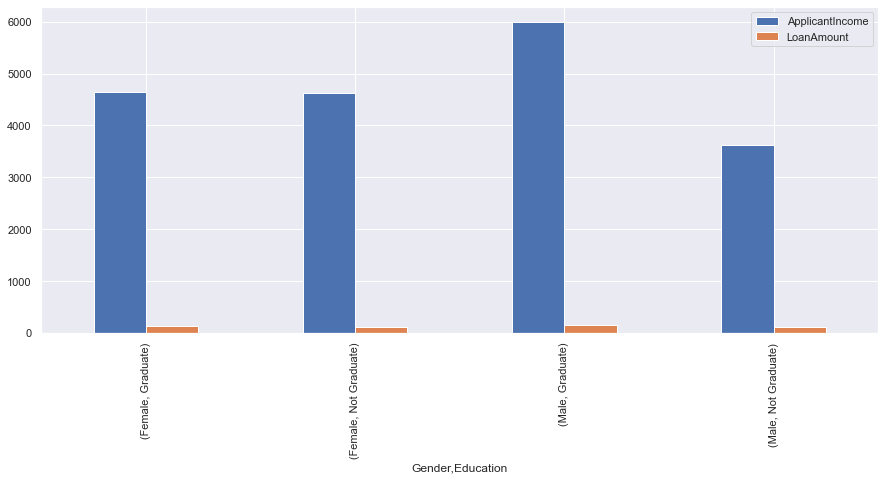

In [41]:
table.plot(kind='bar')

In [42]:
#Mean
table_2 = pd.pivot_table(df, values=['ApplicantIncome', 'LoanAmount'], index=['Self_Employed', 'Credit_History'],
                    aggfunc={'ApplicantIncome': np.mean,
                             'LoanAmount': np.mean})

In [43]:
table_2

ApplicantIncome  LoanAmount
Self_Employed Credit_History                             
No            0.0                 5458.460526  143.356164
              1.0                 5019.431525  141.319892
Yes           0.0                 7135.583333  175.818182
              1.0                 7611.746032  166.639344

<AxesSubplot:xlabel='Self_Employed,Credit_History'>

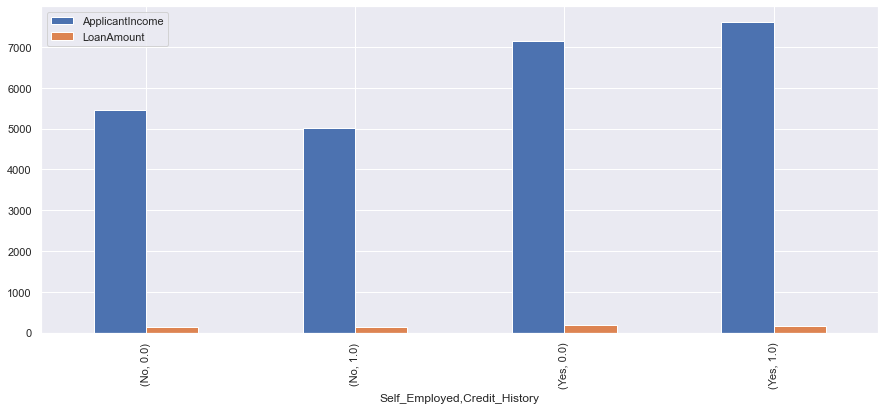

In [44]:
table_2.plot(kind='bar')

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [45]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
#Fill value using the mode in the features/columns that have a low amount of missing values. (Categorical Variables)
#Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History.

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [47]:
#Get descriptive Stats on the LoanAmount column
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [48]:
print("LoanAmount Mean:", df['LoanAmount'].mean())
print("LoanAmount Median:", df['LoanAmount'].median())

LoanAmount Mean: 146.41216216216216
LoanAmount Median: 128.0


In [49]:
#To be more conservative we will use the LoanAmount median as the null replacement.
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [50]:
#Validating if there are anymore missing values.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

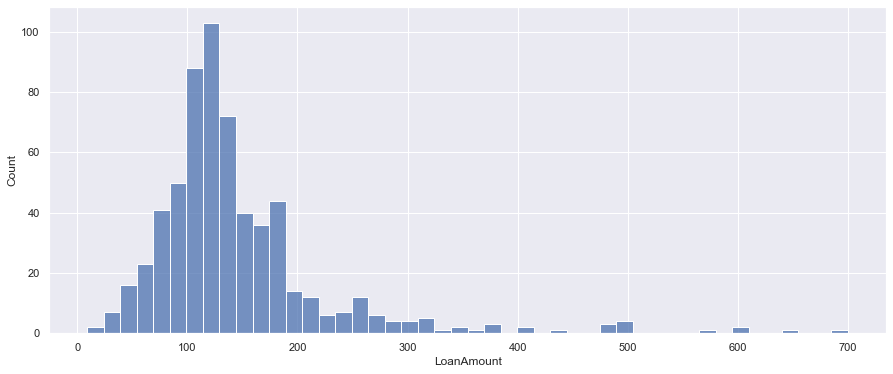

In [51]:
#LoanAmount histrogram before transformation
sns.histplot(data=df, x="LoanAmount")

In [52]:
#Log transformation and create a new column relecting that. This helpos remove outliers.
df['LoanAmountLog'] = np.log(df['LoanAmount'])

<AxesSubplot:xlabel='LoanAmountLog', ylabel='Count'>

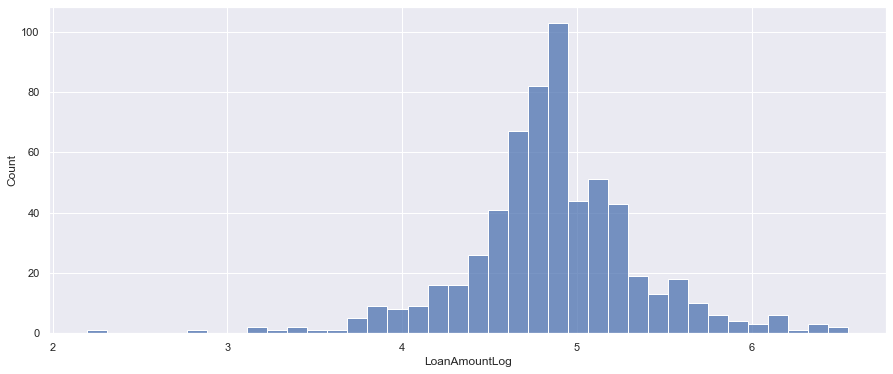

In [53]:
#LoanAmount histrogram after transformation.
sns.histplot(data=df, x="LoanAmountLog")

In [54]:
df['LoanAmountLog'].head()

0    4.852030
1    4.852030
2    4.189655
3    4.787492
4    4.948760
Name: LoanAmountLog, dtype: float64

Combine both incomes as total income and take a log transformation of the same.

In [55]:
#Create TotalIncome column (ApplicantIncome + CoapplicantIncome)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

<AxesSubplot:xlabel='TotalIncome', ylabel='Count'>

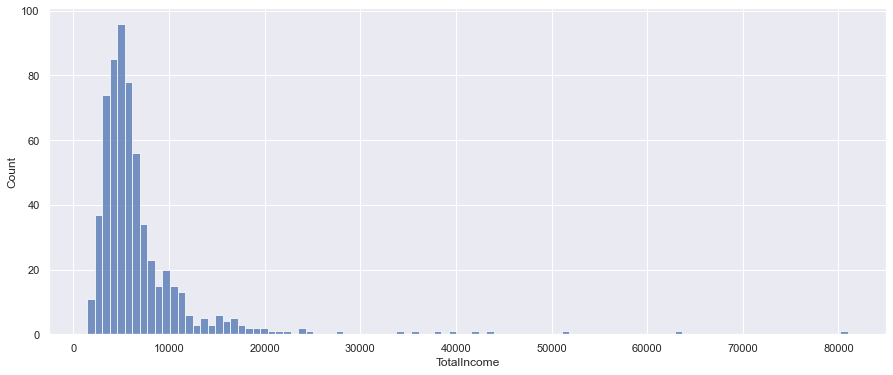

In [56]:
#TotalIncome histrogram before transformation
sns.histplot(data=df, x="TotalIncome")

In [57]:
#Log transformation for TotalIncome
df['TotalIncomeLog'] = np.log(df['TotalIncome'])

<AxesSubplot:xlabel='TotalIncomeLog', ylabel='Count'>

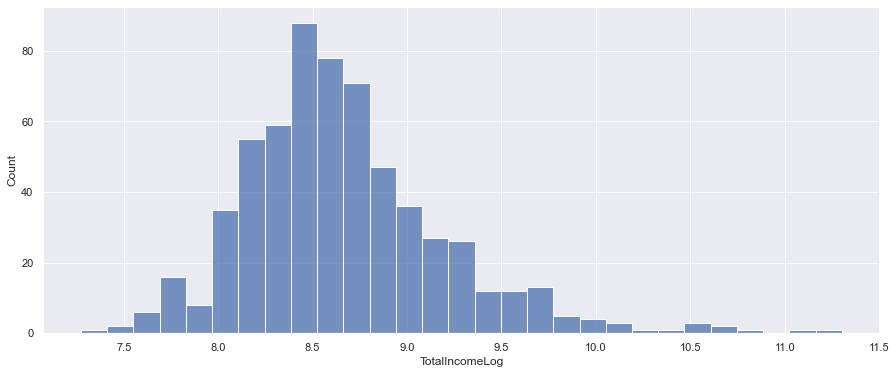

In [58]:
#TotalIncome histrogram after transformation.
sns.histplot(data=df, x="TotalIncomeLog")

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## 4. Building a Predictive Model

In [60]:
#Split between X(features) and y(target).
X = df.drop(['Loan_ID','Loan_Status'], axis=1)
X = pd.get_dummies(X)
y = df['Loan_Status']

In [61]:
#Split between train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=200)

In [62]:
#Get the shape.
print(X_train.shape)
print(y_train.shape)

(491, 23)
(491,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [64]:
y_pred = LogReg.predict(X_test)
print(y_pred)

['Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y']


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.83      0.39      0.54        38
           Y       0.78      0.96      0.86        85

    accuracy                           0.79       123
   macro avg       0.81      0.68      0.70       123
weighted avg       0.80      0.79      0.76       123



In [66]:
accuracy_score(y_test,y_pred)

0.7886178861788617

Try paramater grid search to improve the results

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']},
    {'classifier' : [RandomForestClassifier()],
    'classifier__n_estimators' : list(range(10,101,10)),
    'classifier__max_features' : list(range(6,32,5))}
]

pipe = Pipeline([('classifier' , RandomForestClassifier())])

In [69]:
clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [70]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [71]:
best_clf.predict(X_test)

array(['Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [72]:
y_pred = best_clf.predict(X_test)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           N       0.83      0.39      0.54        38
           Y       0.78      0.96      0.86        85

    accuracy                           0.79       123
   macro avg       0.81      0.68      0.70       123
weighted avg       0.80      0.79      0.76       123



In [74]:
accuracy_score(y_test,y_pred)

0.7886178861788617

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [75]:
#Import required libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [76]:
df = pd.read_csv("data.csv")
X = df.drop(['Loan_ID','Loan_Status'], axis=1)

In [77]:
#Enocde y (target variable) to binary in order to proceed with the model
label_encoder = LabelEncoder()

y = df['Loan_Status']
y = label_encoder.fit_transform(y)

In [78]:
#Split between train and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=200)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [79]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='median')), 
                              ('scaling', StandardScaler())])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

In [80]:
#Numeric: LoanAmount
#Categorical: Gender, Married, Dependents, Self_Employed, Loan_Amount_Term, Credit_History.
preprocessing_loan = ColumnTransformer([('numeric', numeric_transform, ['LoanAmount']), 
                                        ('categorical', categorical_transform, ['Gender', 'Married', 'Education','Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area'])])

In [81]:
pipeline = Pipeline([('preprocessing', preprocessing_loan), 
                          ('model', LinearRegression())])

In [82]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['LoanAmount']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                

In [83]:
pipeline.predict(X_test)

array([ 0.875    ,  0.875    ,  0.7109375,  0.09375  ,  0.7734375,
        0.7265625,  0.7265625,  0.7734375,  0.6953125,  0.6640625,
        0.875    ,  0.75     ,  0.7578125,  0.6875   ,  0.71875  ,
        0.734375 ,  0.015625 ,  0.828125 , -0.0546875,  0.8046875,
        0.859375 ,  0.7109375,  0.6796875,  0.0234375,  0.6953125,
        0.7265625,  0.03125  ,  0.8828125,  0.875    ,  0.828125 ,
        0.703125 ,  0.7109375,  0.765625 ,  0.6796875,  0.765625 ,
        0.7578125,  0.0859375,  0.8671875,  0.859375 ,  0.7265625,
        0.7578125,  0.8515625,  0.8125   , -0.1484375,  0.0703125,
        0.8125   ,  0.7421875,  0.6875   ,  0.7421875,  0.7265625,
        0.7265625,  0.734375 ,  0.7109375,  0.1015625,  0.6953125,
        0.71875  ,  0.71875  , -0.0078125,  0.8671875,  0.8359375,
        0.875    , -0.0078125,  0.8515625,  0.734375 ,  0.6796875,
        0.828125 ,  0.7265625,  0.84375  ,  0.84375  ,  0.7734375,
        0.734375 ,  0.828125 , -0.0078125, -0.0234375,  0.8281

In [84]:
y_pred = pipeline.predict(X_test)

In [85]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test set MSE: {mse}')

Test set MSE: 0.4008017591604201


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [86]:
import pickle

In [100]:
#Use pickle to store model on the disk
pickle.dump(pipeline, open( "model_mini_project.p", "wb" ))

In [110]:
json_data = {'Gender': 'Male',
 'Married': 'No',
 'Dependents': 0,
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 500,
 'CoapplicantIncome': 5,
 'LoanAmount': 55.0,
 'Loan_Amount_Term': 360,
 'Credit_History': 1.0,
 'Property_Area': 'Urban'}

In [ ]:
import requests
URL = "http://192.168.2.36:5555/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [118]:
#Check if response is 200
print(r)

<Response [200]>


In [125]:
print(r.json())

[0.7578125]
